In [2]:
import numpy as np

# 定义 Ridge Regression 训练函数
def ridge_regression(y, tx, lambda_):
    """Ridge regression using normal equations.

    Args:
        y: shape=(N, )
        tx: shape=(N, D)
        lambda_: regularization parameter (scalar)

    Returns:
        w: shape=(D,). The optimal weights vector.
    """
    N, D = tx.shape
    lambda_prime = 2 * N * lambda_
    # 计算 Ridge 回归的闭式解
    w = np.linalg.solve(tx.T @ tx + lambda_prime * np.eye(D), tx.T @ y)
    return w

# 加载数据
x_train_pre = np.loadtxt("x_train_processed_0_missing_1029.csv", delimiter=",", skiprows=1)
y_train = np.loadtxt("y_train.csv", delimiter=",", skiprows=1)

# 提取标签
y_train_pre = y_train[:, 1]

x_test_pre = np.loadtxt("x_test_processed_0_missing_1029.csv", delimiter=",", skiprows=1)

# 修改标签，将 -1 改为 0
y_train_pre[y_train_pre == -1] = 0
y_train_pre = y_train_pre.astype(int)

# 设置正则化参数
lambda_ = 0.1

# 训练 Ridge 回归模型
w_ridge = ridge_regression(y_train_pre, x_train_pre, lambda_)

# 在测试集上进行预测
y_pred_continuous = x_test_pre @ w_ridge

# 将回归预测转换为分类 (0 或 1)
y_pred = (y_pred_continuous >= 0.191).astype(int)


y_pred=np.where(y_pred == 0, -1, y_pred)
# 保存结果
sample_submission = np.loadtxt('sample-submission.csv', delimiter=',', skiprows=1, usecols=0, dtype=int)

header = "Id,Prediction"
results = np.hstack((sample_submission.reshape(-1, 1), y_pred.reshape(-1, 1)))

np.savetxt('C:/Users/y/Documents/ml_exercise/ML_project_1/ridge_classification.csv', 
           results, delimiter=',', header=header, comments='', fmt='%d')


MemoryError: 

In [19]:
from basic_functions import *
# Randomly select 10% of the data
np.random.seed(42)  # For reproducibility
num_samples = x_train_pre.shape[0]
sample_size = int(num_samples * 0.1)
indices = np.random.choice(num_samples, sample_size, replace=False)

# Extract the sampled training data and labels
x_train_sample = x_train_pre[indices]
y_train_sample = y_train_pre[indices]


#lambda=0.1

# 在测试集上进行预测
y_pred_sample_continuous = x_train_sample @ w_ridge

# 将回归预测转换为分类 (0 或 1)
y_pred_sample = (y_pred_sample_continuous >= 0.191).astype(int)


y_pred=np.where(y_pred == 0, -1, y_pred)


f1_score_logiregression=calculate_f1_score(y_pred_sample,y_train_sample)
accuracy_logiregression=calculate_accuracy(y_pred_sample,y_train_sample)
print(f1_score_logiregression,accuracy_logiregression)



0.4137162664025749 0.8556669612653521


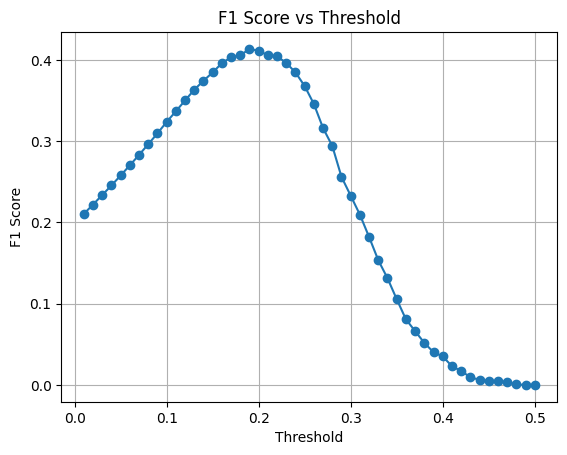

In [22]:

import matplotlib.pyplot as plt

# 假设 y_pred_sample_continuous 和 y_train_sample 已经存在
thresholds = np.linspace(0.01, 0.5, 50)  # 在 0 到 0.5 之间取 50 个不同的阈值
f1_scores = []

# 遍历每个阈值，计算 F1 score
for threshold in thresholds:
    y_pred_sample = (y_pred_sample_continuous >= threshold).astype(int)
    
    # 计算 F1 score
    f1_score = calculate_f1_score(y_pred_sample, y_train_sample)
    f1_scores.append(f1_score)

# 绘制阈值 vs F1 score 的图
plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.grid(True)
plt.show()


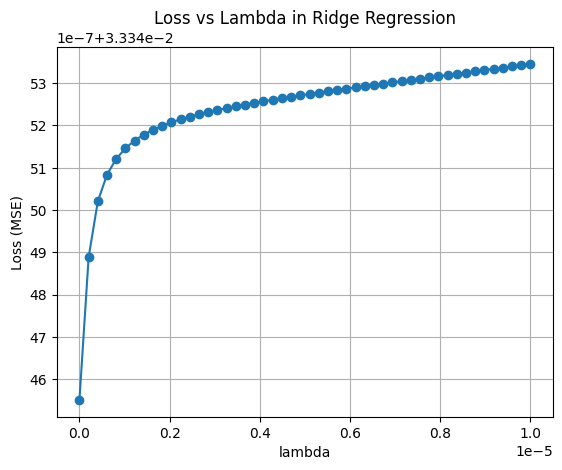

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Ridge Regression 训练函数
def ridge_regression(y, tx, lambda_):
    """Ridge regression using normal equations.

    Args:
        y: shape=(N, )
        tx: shape=(N, D)
        lambda_: regularization parameter (scalar)

    Returns:
        w: shape=(D,). The optimal weights vector.
    """
    N, D = tx.shape
    lambda_prime = 2 * N * lambda_
    # 计算 Ridge 回归的闭式解
    w = np.linalg.solve(tx.T @ tx + lambda_prime * np.eye(D), tx.T @ y)
    return w

# 定义损失函数 (均方误差)
def compute_loss(y, tx, w):
    e = y - tx @ w
    return (1 / (2 * len(y))) * np.sum(e ** 2)

# 加载数据
x_train_pre = np.loadtxt("x_train_encoded.csv", delimiter=",", skiprows=1)
y_train = np.loadtxt("y_train.csv", delimiter=",", skiprows=1)

# 提取标签
y_train_pre = y_train[:, 1]
x_test_pre = np.loadtxt("x_test_encoded.csv", delimiter=",", skiprows=1)

# 修改标签，将 -1 改为 0
y_train_pre[y_train_pre == -1] = 0
y_train_pre = y_train_pre.astype(int)

# 设置 lambda 值的范围 (从 0 到 1)
lambdas = np.linspace(0.000000001,0.00001, 50)
losses = []

# 遍历每个 lambda，计算 loss
for lambda_ in lambdas:
    w_ridge = ridge_regression(y_train_pre, x_train_pre, lambda_)
    loss = compute_loss(y_train_pre, x_train_pre, w_ridge)
    losses.append(loss)

# 绘制 lambda vs loss 图
plt.plot(lambdas, losses, marker='o')
plt.xlabel("lambda")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Lambda in Ridge Regression")
plt.grid(True)
plt.show()
